# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### This dataset is from the TMDb listing movie titles, cast, ratings, votes etc. The data needs to be cleaned first then we could ask questions like:
#### 1.	How has average runtime changed over the years?
#### 2.	Which month sees the most releases?
#### 3.	Which actors have starred in most movies?
#### 4.	Does higher budget correlate with higher popularity?
#### 5.	Does higher vote count correlate with higher revenue?
#### 6.	How would the distribution of popularity ratings for movies of the top 5 actors look like?

In [149]:
# Importing packages for use throughout the notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import timedelta

In [150]:
#Loading the CSV data file using read_csv function from pandas package
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### Printing first few lines of the data

In [151]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Getting the number of columns and rows

In [152]:
df.shape

(10866, 21)

#### Getting info about the data

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Dropping columns not needed for data analysis

In [154]:
#columns like id, homepage, tagline etc. cannot be used for data analysis, hence are being dropped.
del_col_list = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 
                'production_companies']
df = df.drop(columns = del_col_list, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
 13  budget_adj      10866 non-null  float64
 14  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


#### Checking the shape again

In [155]:
df.shape

(10866, 15)

#### Checking for null rows in each column

In [156]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

#### Dropping null rows

In [157]:
df.dropna(axis='rows', inplace=True)

#### Checking for null rows again

In [158]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

#### Getting info after dropping rows and columns

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10732 non-null  int64  
 1   popularity      10732 non-null  float64
 2   budget          10732 non-null  int64  
 3   revenue         10732 non-null  int64  
 4   original_title  10732 non-null  object 
 5   cast            10732 non-null  object 
 6   director        10732 non-null  object 
 7   runtime         10732 non-null  int64  
 8   genres          10732 non-null  object 
 9   release_date    10732 non-null  object 
 10  vote_count      10732 non-null  int64  
 11  vote_average    10732 non-null  float64
 12  release_year    10732 non-null  int64  
 13  budget_adj      10732 non-null  float64
 14  revenue_adj     10732 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


#### I noticed that the datatype for 'release_date' is is object. Converting it to datetime would provide a greater functionality.

In [160]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

#### But...

In [161]:
df.release_date.describe()

count                   10732
unique                   5872
top       2009-01-01 00:00:00
freq                       27
first     1970-01-03 00:00:00
last      2069-12-29 00:00:00
Name: release_date, dtype: object

#### We can see that the last date goes upto 2069!! How is that possible?!

from the [docs](https://docs.python.org/3/library/time.html)

> **Year 2000 (Y2K) issues**: Python depends on the platform’s C library, which generally doesn’t have year 2000 issues, since all dates and times are represented internally as seconds since the epoch. Function strptime() can parse 2-digit years when given %y format code. When 2-digit years are parsed, they are converted according to the POSIX and ISO C standards: values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068.

#### I shall perform 'query' for release_dates higher than this year and offset them by 100 years

In [162]:
df_err = df.query('release_date > "31-12-2020"').release_date - pd.offsets.DateOffset(years=100)
for i in df_err.index:
    df.loc[i,'release_date'] = df_err[i]
df.release_date.describe()

count                   10732
unique                   5872
top       2009-01-01 00:00:00
freq                       27
first     1960-01-01 00:00:00
last      2015-12-31 00:00:00
Name: release_date, dtype: object

#### The index seems to be according to the number rows before cleaning, we get that by comparing the last index to length 
#### let's change that.

In [163]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863, 10864,
            10865],
           dtype='int64', length=10732)

In [164]:
df.reset_index(inplace=True)
df.index

RangeIndex(start=0, stop=10732, step=1)

In [165]:
df.tail()

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10727,10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,1966-06-15,11,7.4,1966,0.000000,0.0
10728,10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,1966-12-21,20,5.7,1966,0.000000,0.0
10729,10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,1966-01-01,11,6.5,1966,0.000000,0.0
10730,10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,1966-11-02,22,5.4,1966,0.000000,0.0
10731,10865,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,1966-11-15,15,1.5,1966,127642.279154,0.0


#### Dropping old index column

In [166]:
df.drop(columns=['index'], inplace=True)
df.tail()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10727,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,1966-06-15,11,7.4,1966,0.000000,0.0
10728,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,1966-12-21,20,5.7,1966,0.000000,0.0
10729,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,1966-01-01,11,6.5,1966,0.000000,0.0
10730,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,1966-11-02,22,5.4,1966,0.000000,0.0
10731,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,1966-11-15,15,1.5,1966,127642.279154,0.0


#### Checking for duplicates

In [167]:
df[df.id.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2051,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010,30000000.0,967000.0


#### Dropping the duplicate(s)

In [168]:
df=df.drop_duplicates(subset=['id'])
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df.tail()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10726,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,1966-06-15,11,7.4,1966,0.000000,0.0
10727,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,1966-12-21,20,5.7,1966,0.000000,0.0
10728,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,1966-01-01,11,6.5,1966,0.000000,0.0
10729,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,1966-11-02,22,5.4,1966,0.000000,0.0
10730,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,1966-11-15,15,1.5,1966,127642.279154,0.0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### How has average runtime changed over the years?

#### Finding mean of runtime while grouping by release_year

In [169]:
df_rt = pd.DataFrame(df.groupby('release_year').runtime.mean())
df_rt.reset_index(inplace=True)
df_rt.head(5)

,release_year,runtime
0,1960,110.656250
1,1961,119.419355
2,1962,124.343750
3,1963,111.323529
4,1964,109.214286


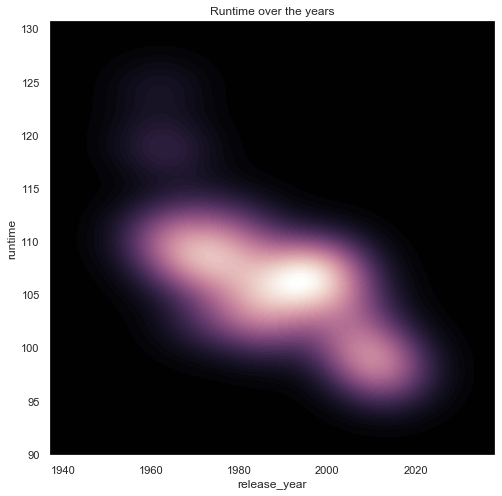

In [170]:
f, ax = plt.subplots(figsize=(8,8))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0,light=1,reverse=True)
sns.kdeplot(data=df_rt.release_year,data2=df_rt.runtime,shade=True,cmap = cmap,n_levels=80)
ax.set_title("Runtime over the years");

#### *The above plot clearly indicates that the average runtime has noticed a decline as years progress. The correlation table below agrees with our findings, that there is a fair negative correlation.*

In [171]:
df_rt.corr()

,release_year,runtime
release_year,1.000000,-0.746932
runtime,-0.746932,1.000000


In [172]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.009464,-0.138935,-0.097424,-0.083996,-0.032767,-0.071896,0.510385,-0.186980,-0.137099
popularity,-0.009464,1.000000,0.544240,0.662843,0.138278,0.800619,0.217906,0.093044,0.512098,0.608384
budget,-0.138935,0.544240,1.000000,0.734487,0.192168,0.632074,0.087318,0.119004,0.968881,0.621809
revenue,-0.097424,0.662843,0.734487,1.000000,0.164276,0.790889,0.178477,0.059072,0.705949,0.918990
runtime,-0.083996,0.138278,0.192168,0.164276,1.000000,0.164966,0.177276,-0.119286,0.222645,0.177397
vote_count,-0.032767,0.800619,0.632074,0.790889,0.164966,1.000000,0.260554,0.110317,0.586298,0.707517
vote_average,-0.071896,0.217906,0.087318,0.178477,0.177276,0.260554,1.000000,-0.127746,0.099925,0.199418
release_year,0.510385,0.093044,0.119004,0.059072,-0.119286,0.110317,-0.127746,1.000000,0.019379,-0.064949
budget_adj,-0.186980,0.512098,0.968881,0.705949,0.222645,0.586298,0.099925,0.019379,1.000000,0.645937
revenue_adj,-0.137099,0.608384,0.621809,0.918990,0.177397,0.707517,0.199418,-0.064949,0.645937,1.000000


### Which month sees the most releases?

In [173]:
df_rel = pd.DataFrame(df.release_date)
df_rel['month'] = df['release_date'].dt.strftime('%b')
df_rel.head(5)

,release_date,month
0,2015-06-09,Jun
1,2015-05-13,May
2,2015-03-18,Mar
3,2015-12-15,Dec
4,2015-04-01,Apr


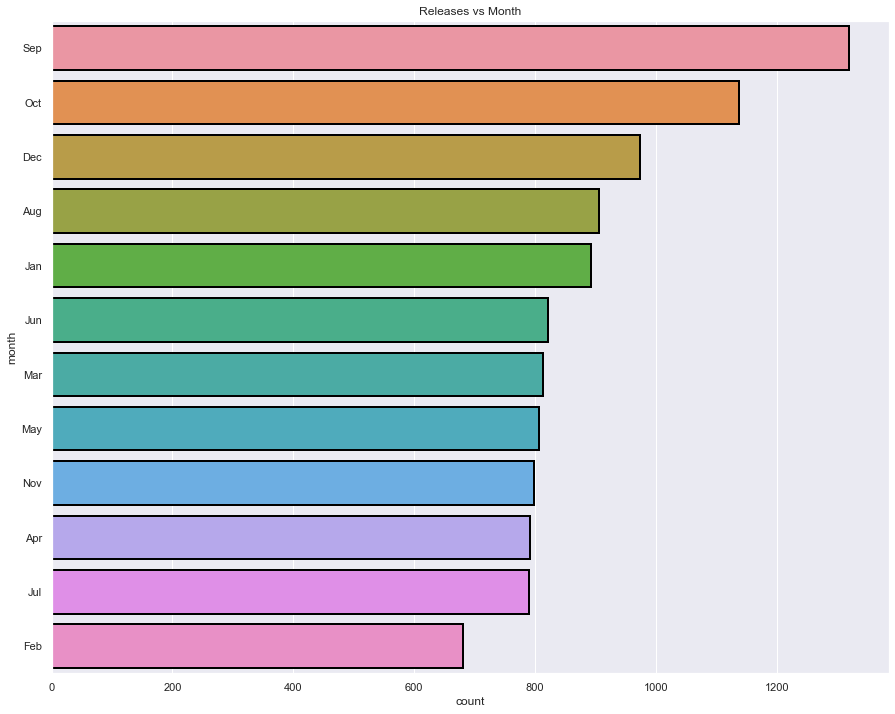

In [174]:
f, ax = plt.subplots(figsize=(15,12))
sns.set(style="darkgrid")
sns.countplot(y = 'month',
              data = df_rel,
              order = df_rel['month'].value_counts().index, 
              edgecolor=(0,0,0),
              linewidth=2)
ax.set_title("Releases vs Month");

#### *As the above plot clearly shows that September has the most releases, followed by October and December. February sees the lowest number of releases, it could be attributed to its lower number of days.*

### Which actors have starred in most movies?

#### First, let's separate actors from cast column.

In [175]:
actor_lst = []
actor = ""
for actor in df.cast:
    temp = list(actor.split('|'))
    actor_lst+=temp    

#### Making a unique list of actors from the above data in order to perform a count

In [176]:
actor_uni = list(set(actor_lst))

In [177]:
actor_count = {}
for actor1 in actor_uni:
    count = actor_lst.count(actor1)
    actor_count[actor1]=count

#### Now, let's sort the list

In [178]:
actor_count = {k: v for k, v in sorted(actor_count.items(), key=lambda item: item[1], reverse=True)}

#### Converting dictionary to data frame for easier operation

In [179]:
df_top = pd.DataFrame(actor_count.items(), columns=['Actor', 'No. of Movies'])

#### Let's get a list top 15 actors

In [180]:
df_top = df_top.head(15)
df_top

,Actor,No. of Movies
0,Robert De Niro,72
1,Samuel L. Jackson,71
2,Bruce Willis,62
3,Nicolas Cage,61
4,Michael Caine,53
5,Robin Williams,51
6,John Cusack,50
7,Morgan Freeman,49
8,John Goodman,49
9,Susan Sarandon,48


#### Let's plot a distribution depicting the no. of movies for a particular actor

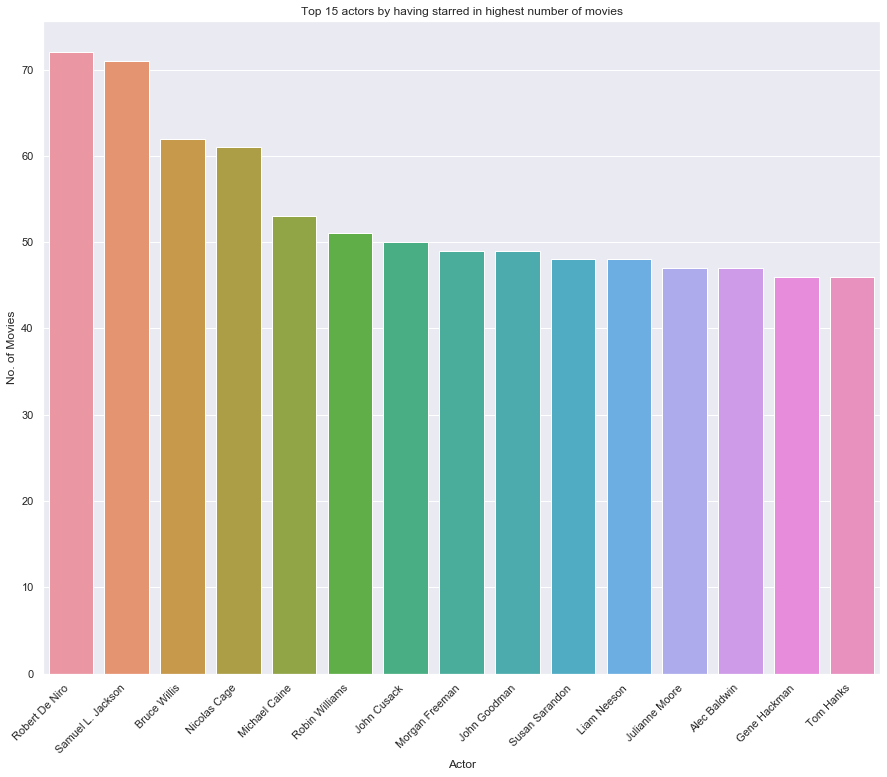

In [181]:
f, ax = plt.subplots(figsize=(15,12))
sns.set(style="darkgrid")
chart = sns.barplot(x = df_top['Actor'],
                    y = df_top['No. of Movies']);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Top 15 actors by having starred in highest number of movies");

### *This plot clearly indicates that male actors have always received more movies than female actors.*

#### Getting a multi-dimensional list of actors

In [182]:
df_cast = df.cast
actor_list = []
i = 0
actor = ""
for actor in df_cast:
    temp = list(actor.split('|'))
    actor_list.append(temp) 

#### A function for getting the list of index locations of the movies for the given actor: `actor_search`

In [183]:
def actor_search(act_srch):
    act_loc = []
    for i in range(len(actor_list)-1):
        temp = actor_list[i]
        if act_srch in temp:
            act_loc.append(i)
    return(act_loc)

#### A function for getting the total revenue for the movies of a given actor: `total_revenue`

In [184]:
def total_revenue(actor):
    sum=0
    loc_lst = actor_search(actor)
    for i in loc_lst:
        sum = sum + df.iloc[i].revenue
    return sum

#### Getting a list of actors with highest sum of revenue of their movies

In [185]:
df_rev = pd.DataFrame(columns=['actor','sum_of_revenue'])
act = []
rev= []
for actor in actor_uni:
    act.append(actor)
    rev.append(total_revenue(actor))
df_rev.actor = act
df_rev.sum_of_revenue = rev
df_rev.head(5)

,actor,sum_of_revenue
0,Derek Richardson,80578934
1,Roman Podhora,0
2,Marshall Chapman,20529194
3,Arliss Howard,101229792
4,Frances de la Tour,70968598


#### Sorting the values in descending order and considering only the top 15 actors

In [186]:
df_rev = df_rev.sort_values(by='sum_of_revenue', ascending=False).head(15)
df_rev.head(5)

,actor,sum_of_revenue
10652,Harrison Ford,8922840695
13634,Tom Cruise,8812436186
9447,Tom Hanks,8418142612
4297,Emma Watson,8176916698
9997,Ian McKellen,8115046043


#### Plotting the top 15

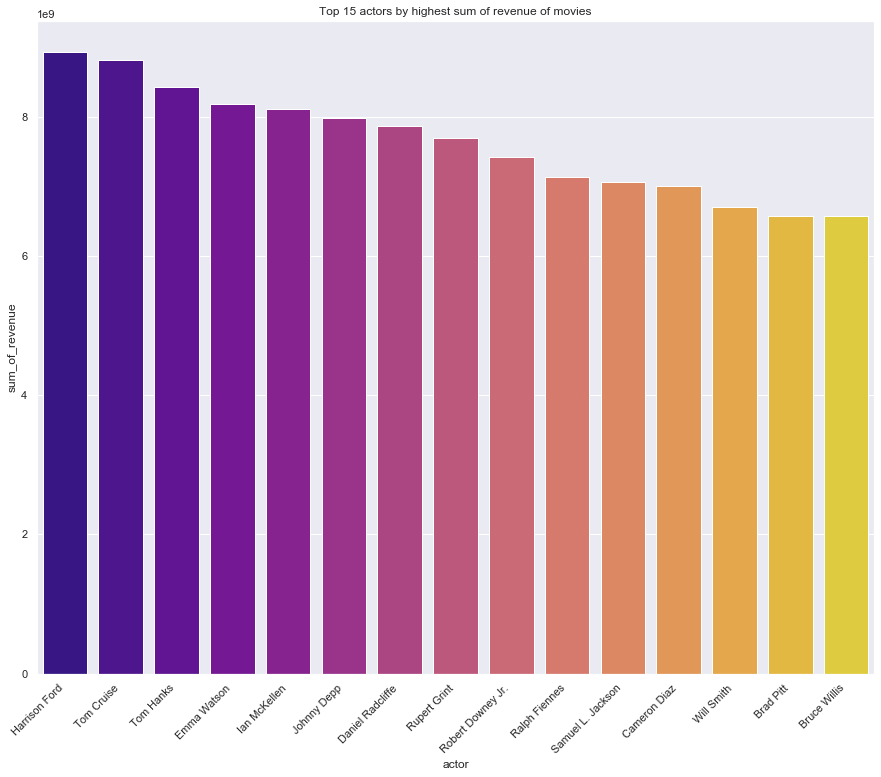

In [187]:
f, ax = plt.subplots(figsize=(15,12))
sns.set(style="white")

chart = sns.barplot(x = df_rev['actor'],
                    y = df_rev['sum_of_revenue'],
                    palette="plasma");
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Top 15 actors by highest sum of revenue of movies");

### Does higher budget correlate with higher popularity?

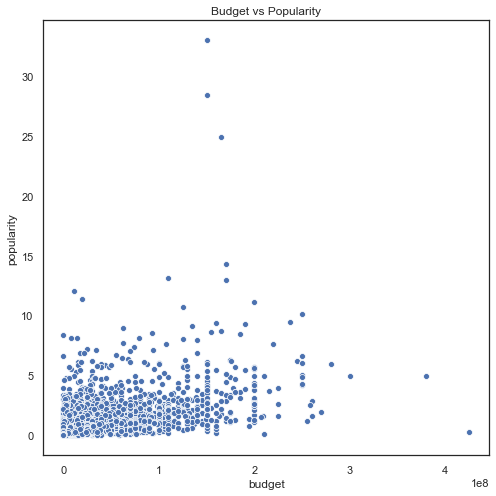

In [188]:
f, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x="budget", y="popularity", data=df, ax=ax)
ax.set_title("Budget vs Popularity");

#### *Not so much. Budget has a slight positive correlation with popularity.*

### Does higher vote count correlate with higher revenue?

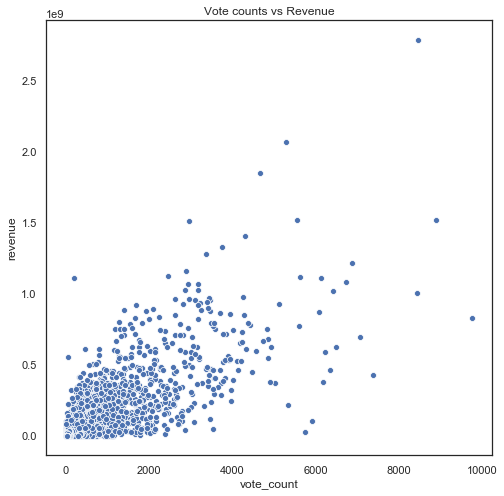

In [189]:
f, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x="vote_count", y="revenue", data=df, ax=ax)
ax.set_title("Vote counts vs Revenue");

#### *That's a stronger positive correlation than before. This means that somehow higher number of votes can be thought of as an indication of higher revenue.*

### How would the distribution of popularity ratings for movies of the top 5 actors look like?

#### We take the top 5 actors accoprding to the numbers of movies
1. Robert De Niro
2. Samuel L. Jackson
3. Bruce Willis
4. Nicolas Cage
5. Michael Caine

Bonus: Robin Williams

#### Preventing repetitive code by defining a function for ratings by actor.

In [190]:
def ratings(actor):    
    rat_df = pd.DataFrame(columns=['title','rating'])
    loc_lst = actor_search(actor)
    mov= []
    rat= []
    for i in loc_lst:
        mov.append(df.iloc[i].original_title)
        rat.append(df.iloc[i].vote_average)
    rat_df['title']=mov
    rat_df['rating']=rat
    return rat_df

#### 1. Robert De Niro

In [191]:
rat_rdn = ratings("Robert De Niro")
rat_rdn.head(5)

,title,rating
0,The Intern,7.1
1,Joy,6.4
2,Heist,5.4
3,Ellis,7.2
4,The Audition,6.1


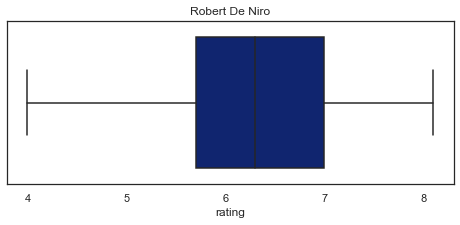

In [192]:
f, ax = plt.subplots(figsize=(8,3))
sns.set(palette='dark')
sns.boxplot(rat_rdn.rating,ax=ax)
ax.set_title('Robert De Niro');

#### *No outliers! That means Robert De Niro movies consistently receive ratings just above six with the upper and lower quartile being almost equidistant. A distribution very close to a normal distribution. Although the longer left whisker indicates greater spread below the average.*

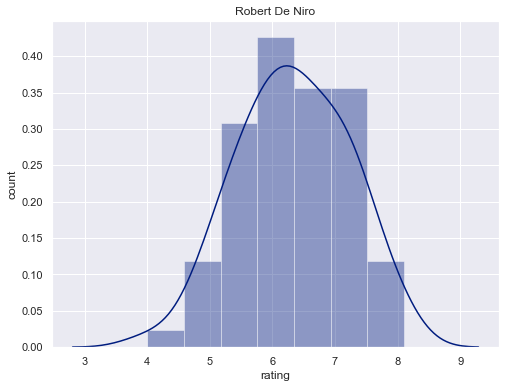

In [193]:
f, ax = plt.subplots(figsize=(8,6))
sns.set(palette='dark')
sns.distplot(rat_rdn.rating,ax=ax)
ax.set_title('Robert De Niro')
ax.set_ylabel("count");

#### 2. Samuel L. Jackson

In [194]:
rat_slj = ratings("Samuel L. Jackson")
rat_slj.head()

,title,rating
0,The Hateful Eight,7.4
1,Kingsman: The Secret Service,7.6
2,Barely Lethal,5.5
3,Chi-Raq,5.9
4,Captain America: The Winter Soldier,7.6


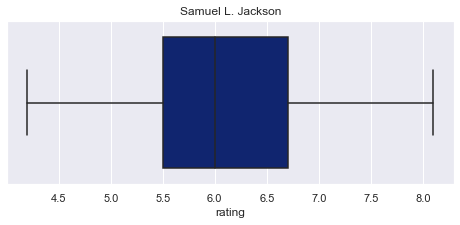

In [195]:
f, ax = plt.subplots(figsize=(8,3))
sns.set(palette='dark')
sns.boxplot(rat_slj.rating,ax=ax)
ax.set_title('Samuel L. Jackson');

#### *Unlike the previous distribution, this distribution has a slight positive skewness.*

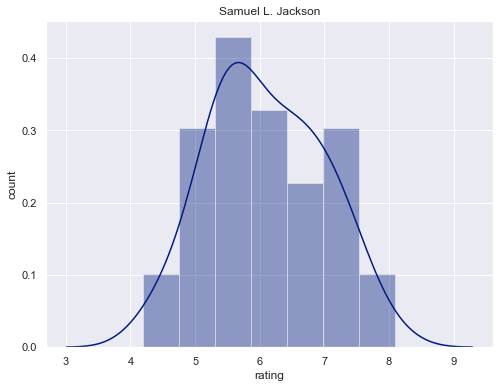

In [196]:
f, ax = plt.subplots(figsize=(8,6))
sns.set(palette='dark')
sns.distplot(rat_slj.rating,ax=ax)
ax.set_title('Samuel L. Jackson')
ax.set_ylabel("count");

#### 3. Bruce Willis

In [197]:
rat_bw = ratings("Bruce Willis")
rat_bw.head()

,title,rating
0,Vice,4.1
1,Extraction,4.2
2,Rock the Kasbah,5.1
3,The Prince,4.6
4,Surrogates,5.7


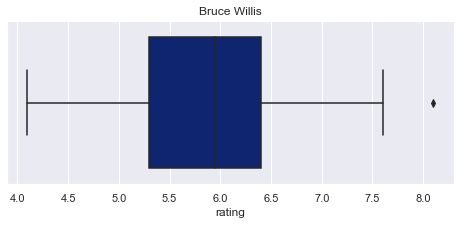

In [198]:
f, ax = plt.subplots(figsize=(8,3))
sns.set(palette='dark')
sns.boxplot(rat_bw.rating,ax=ax)
ax.set_title('Bruce Willis');

#### *Seems like the Die-Hard star has a lot of movies rated below 6 with an average just below 6. A slight negative skew is an indication of the same. A single outlier on the higher side, and that's the only 8+ rated movies he's been in. Fun fact: I can guess it's Pulp Fiction*

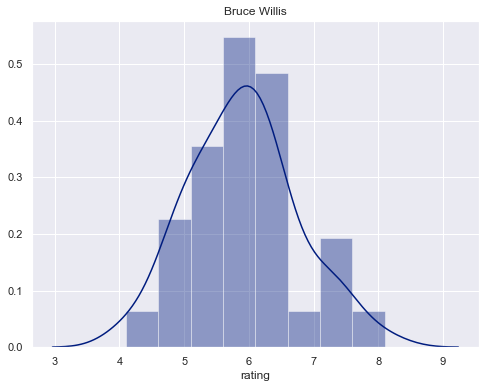

In [199]:
f, ax = plt.subplots(figsize=(8,6))
sns.set(palette='dark')
sns.distplot(rat_bw.rating,ax=ax)
ax.set_title('Bruce Willis');

#### 4. Nicolas Cage

In [200]:
rat_nc = ratings("Nicolas Cage")
rat_nc.head()

,title,rating
0,Pay the Ghost,5.3
1,The Runner,4.8
2,Left Behind,3.8
3,Outcast,4.4
4,Dying of the Light,4.4


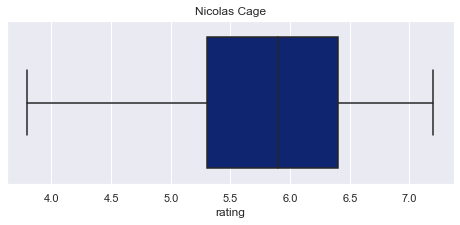

In [201]:
f, ax = plt.subplots(figsize=(8,3))
sns.set(palette='dark')
sns.boxplot(rat_nc.rating,ax=ax)
ax.set_title('Nicolas Cage');

#### *Nicolas Cage's movies have been rated mostly below average, hence the whiskers do no extend much on the right. The spread below average is quite greater than the spread of the data above average. Overall, a negatively skewed distribution.*

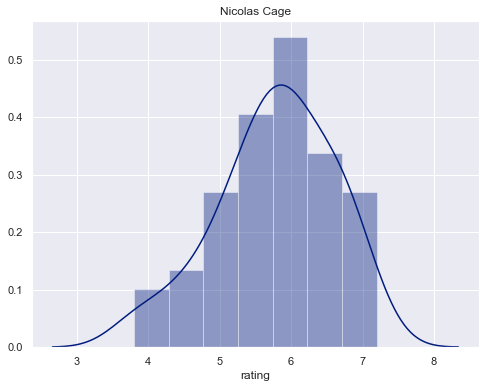

In [202]:
f, ax = plt.subplots(figsize=(8,6))
sns.set(palette='dark')
sns.distplot(rat_nc.rating,ax=ax)
ax.set_title('Nicolas Cage');

#### 5. Michael Caine

In [203]:
rat_mc = ratings("Michael Caine")
rat_mc.head()

,title,rating
0,Kingsman: The Secret Service,7.6
1,The Last Witch Hunter,5.6
2,Interstellar,8.0
3,Stonehearst Asylum,6.6
4,Interstellar: Nolan's Odyssey,7.9


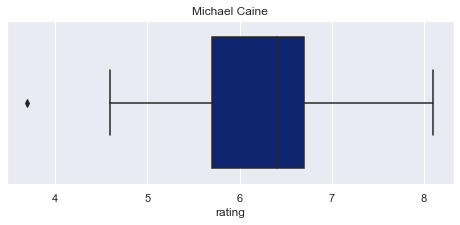

In [204]:
f, ax = plt.subplots(figsize=(8,3))
sns.set(palette='dark')
sns.boxplot(rat_mc.rating,ax=ax)
ax.set_title('Michael Caine');

#### *The ratings for movies starring Michael Caine have been consistent above the average, which seems just below 6.5. Although for movies below the average have a greater spread and mind you, an outlier too. The distribution for the ratings show a negative skew.*

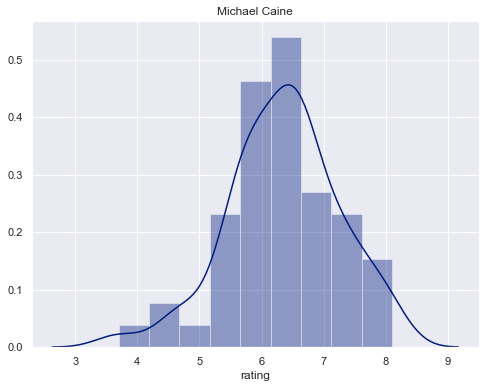

In [205]:
f, ax = plt.subplots(figsize=(8,6))
sns.set(palette='dark')
sns.distplot(rat_mc.rating,ax=ax)
ax.set_title('Michael Caine');

#### My favorite actor: Robin Williams
#### I had to include him to this list.

In [206]:
rat_rw = ratings("Robin Williams")
rat_rw.head()

,title,rating
0,Richard Pryor: Omit the Logic,6.7
1,Night at the Museum: Secret of the Tomb,6.1
2,A Merry Friggin' Christmas,4.7
3,The Angriest Man in Brooklyn,5.5
4,Boulevard,5.6


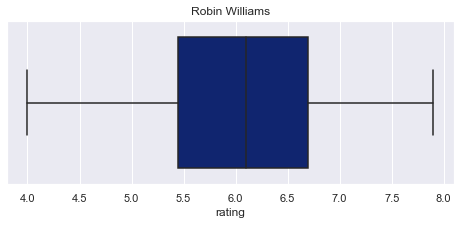

In [207]:
f, ax = plt.subplots(figsize=(8,3))
sns.set(palette='dark')
sns.boxplot(rat_rw.rating,ax=ax)
ax.set_title('Robin Williams');

#### *Seems like a normal distribution except for the slightly higher spread on the lower side. Robin Williams has been consistent on the higher side. And no outliers this time. Histogram shows a bimodal distribution.*

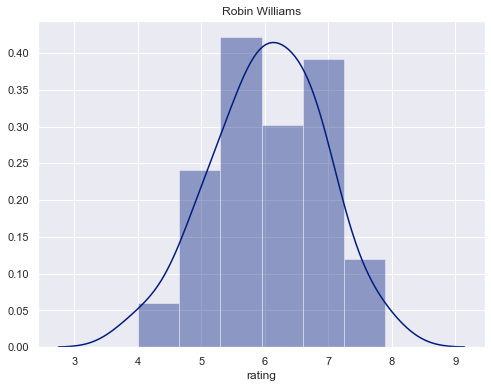

In [208]:
f, ax = plt.subplots(figsize=(8,6))
sns.set(palette='dark')
sns.distplot(rat_rw.rating,ax=ax)
ax.set_title('Robin Williams');

#### I really wist to see all the boxplots beside each other. Let's do that.

#### Labeling dataframe for specific actor before combining

In [209]:
rat_rdn['actor']=np.repeat("Robert De Niro", len(rat_rdn.index))
rat_slj['actor']=np.repeat("Samuel L. Jackson", len(rat_slj.index))
rat_bw['actor']=np.repeat("Bruce Willis", len(rat_bw.index))
rat_nc['actor']=np.repeat("Nicolas Cage", len(rat_nc.index))
rat_mc['actor']=np.repeat("Michael Caine", len(rat_mc.index))
rat_rw['actor']=np.repeat("Robin Williams", len(rat_rw.index))
rat_rdn.head(1)

,title,rating,actor
0,The Intern,7.1,Robert De Niro


#### Let's combine the dataframes

In [210]:
df_rat = rat_rdn.append(rat_slj.append(rat_bw.append(rat_nc.append(rat_mc.append(rat_rw)))))
df_rat = df_rat.reset_index()
df_rat.drop(columns=['index'], inplace=True)
df_rat.tail()

,title,rating,actor
365,"Good Morning, Vietnam",7.0,Robin Williams
366,Awakenings,7.4,Robin Williams
367,Cadillac Man,4.0,Robin Williams
368,Mrs. Doubtfire,6.9,Robin Williams
369,Club Paradise,4.1,Robin Williams


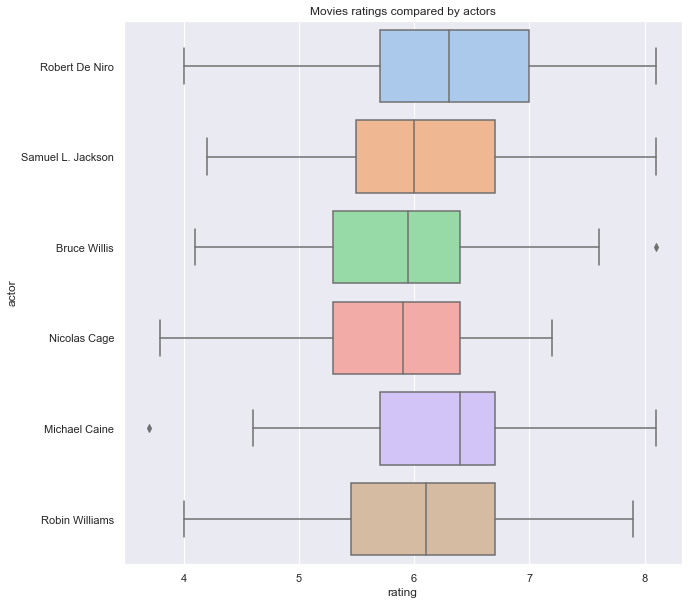

In [211]:
f, ax = plt.subplots(figsize=(10,10))
sns.set(palette='pastel')
sns.boxplot(x=df_rat.rating, y = df_rat.actor,ax=ax)
ax.set_title("Movies ratings compared by actors");

### *In terms of highest ratings achieved Robert De Niro, Samuel L. Jackson,  Michael Caine and Bruce Willis(the outlier) seem to settle for a tie. Highest averages are for Michael caine while the lowest for Nicolas Cage. Robert De Niro's movies have the greatest spread.*

<a id='conclusions'></a>
## Conclusions

### We can conclude from our findings that:
#### 1. The runtime has seen a decline over the years.
#### 2. The start of autumn (Sep-Oct) has the highest number of releases. While, the spring season sees the lowest number of releases. February has the lowest number of releases which could be attributed to its low number of days.
#### 3. According to the cleaned dataset, Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage, and Michael Caine top the listby starring in most movies. Top female actors have grabbed 10th and 11th position, which clearly shows how female actors are given less number of movies that males.
#### 4. Budget has a weak impact on popularity as stated by this dataset. Correlation does not imply causation.
#### 5. Movies making a larger revenue tend to be voted by more people.
#### 6. The distribution of the ratings for each actor's movies and observation is made and then their boxplots are compared side-by-side.

### Limitations
#### 1. The dataset in not the complete or updated in terms of movie releases.
#### 2. The cast column has only five actors at an average which could be misleading. I have performed this analysis on the assumption that there were only those actors in the movie which cannot be true.
#### 3. While cleaning, I had to remove many of the rows due to missing data. If they were present with proper data, this analysis could have given different results.
